In [1]:
import pandas as pd 
import numpy as np 

# Data

In [2]:
categorical = pd.read_csv('categorical7_02.csv')
numerical = pd.read_csv('numerical7_02.csv')
target = pd.read_csv('target7_02.csv')

In [3]:
categorical = categorical.drop(['Unnamed: 0'],axis=1)
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,U,F,3,NaN,NaN,L,E,C,T,2
1,CA,14,H,M,3,NaN,NaN,L,G,A,S,1
2,NC,43,U,M,3,NaN,NaN,L,E,C,R,2
3,CA,44,U,F,3,NaN,NaN,L,E,C,R,2
4,FL,16,H,F,3,12.0,NaN,L,F,A,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,U,M,3,NaN,NaN,L,G,C,C,2
95408,TX,24,H,M,3,NaN,NaN,L,F,A,C,1
95409,MI,30,U,M,3,NaN,NaN,L,E,B,C,3
95410,CA,24,H,F,2,12.0,NaN,L,F,A,C,1


In [4]:
numerical = numerical.drop(['Unnamed: 0'],axis=1)
numerical

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,5.0,5.0,0,0,39,34,...,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,...,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,...,5.0,9512,9001,9101.0,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.000000,1.0,4.0,2,0,23,14,...,10.0,9512,8702,8711.0,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.000000,3.0,2.0,60,1,28,9,...,15.0,9601,7903,8005.0,14.0,6.864865,7112,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,61.611649,5.0,5.0,0,14,36,47,...,25.0,9602,9602,0.0,6.0,25.000000,184568,0,1,12.0
95408,9601,1,5001,48.000000,7.0,9.0,1,0,31,43,...,20.0,9603,9603,0.0,6.0,20.000000,122706,1,1,2.0
95409,9501,1,3801,60.000000,5.0,5.0,0,0,18,46,...,10.0,9610,9410,9501.0,3.0,8.285714,189641,1,3,34.0
95410,8601,0,4005,58.000000,7.0,5.0,0,0,28,35,...,18.0,9701,8612,8704.0,4.0,12.146341,4693,1,4,11.0


In [5]:
target = target.drop(['Unnamed: 0'],axis=1)
target

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


# NaNs

In [6]:
categorical.isna().sum()

STATE           0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
SOLIH       89212
VETERANS    84986
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
dtype: int64

In [7]:
categorical.SOLIH.value_counts()

# categorical.SOLIH = categorical.SOLIH.astype(object)

categorical.SOLIH = categorical.SOLIH.fillna(20.0)

categorical.SOLIH = categorical.SOLIH.astype(object)

categorical.SOLIH.value_counts()

20.0    89212
12.0     5693
0.0       296
1.0        94
2.0        75
3.0        19
4.0        16
6.0         7
Name: SOLIH, dtype: int64

In [8]:
categorical.VETERANS.value_counts()

Y    10426
Name: VETERANS, dtype: int64

In [9]:
categorical.VETERANS = categorical.VETERANS.fillna('N')

In [10]:
categorical.VETERANS.value_counts()

N    84986
Y    10426
Name: VETERANS, dtype: int64

In [11]:
numerical.isna().sum()

ODATEDW     0
TCODE       0
DOB         0
AGE         0
INCOME      0
           ..
AVGGIFT     0
CONTROLN    0
HPHONE_D    0
RFA_2F      0
CLUSTER2    0
Length: 322, dtype: int64

In [12]:
for i in ['CLUSTER', 'DATASRCE', 'SOLIH', 'DOMAIN_B']:
    categorical[i] = categorical[i].astype(object)

In [13]:
categorical.dtypes

STATE       object
CLUSTER     object
HOMEOWNR    object
GENDER      object
DATASRCE    object
SOLIH       object
VETERANS    object
RFA_2R      object
RFA_2A      object
GEOCODE2    object
DOMAIN_A    object
DOMAIN_B    object
dtype: object

In [14]:
X = pd.concat([numerical,categorical],axis=1)
y = target.drop(['TARGET_D'],axis=1)

In [50]:
y

,TARGET_B
0,0
1,0
2,0
3,0
4,0
...,...
95407,0
95408,0
95409,0
95410,1


In [15]:
X

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,8901,0,3712,60.000000,5.0,5.0,0,0,39,34,...,U,F,3,20.0,N,L,E,C,T,2
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,...,H,M,3,20.0,N,L,G,A,S,1
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,...,U,M,3,20.0,N,L,E,C,R,2
3,8701,0,2801,70.000000,1.0,4.0,2,0,23,14,...,U,F,3,20.0,N,L,E,C,R,2
4,8601,0,2001,78.000000,3.0,2.0,60,1,28,9,...,H,F,3,12.0,N,L,F,A,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,61.611649,5.0,5.0,0,14,36,47,...,U,M,3,20.0,N,L,G,C,C,2
95408,9601,1,5001,48.000000,7.0,9.0,1,0,31,43,...,H,M,3,20.0,N,L,F,A,C,1
95409,9501,1,3801,60.000000,5.0,5.0,0,0,18,46,...,U,M,3,20.0,N,L,E,B,C,3
95410,8601,0,4005,58.000000,7.0,5.0,0,0,28,35,...,H,F,2,12.0,N,L,F,A,C,1


In [16]:
y

,TARGET_B
0,0
1,0
2,0
3,0
4,0
...,...
95407,0
95408,0
95409,0
95410,1


# Modelling

In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

In [18]:
X_train_num = X_train.select_dtypes(np.number) 
X_train_cat = X_train.select_dtypes(object)

X_test_num = X_test.select_dtypes(np.number)
X_test_cat  = X_test.select_dtypes(object)

In [52]:
X_train

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
52605,9401,0,4001,58.000000,2.0,5.0,0,0,37,36,...,U,F,2,20.0,N,L,D,A,T,2
41978,9001,1,1801,80.000000,4.0,5.0,0,0,42,6,...,H,M,2,20.0,Y,L,E,A,C,2
69887,8601,0,0,61.611649,5.0,5.0,0,2,51,46,...,U,F,3,20.0,N,L,D,B,T,2
19532,8901,1,2005,78.000000,5.0,5.0,0,7,32,46,...,U,M,3,20.0,N,L,F,A,C,3
55144,8801,1,1911,78.000000,5.0,5.0,0,0,0,0,...,U,M,3,12.0,N,L,E,C,R,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,9001,1,2702,71.000000,2.0,5.0,0,3,33,28,...,H,M,2,20.0,Y,L,F,A,S,2
73349,8901,0,5112,46.000000,5.0,6.0,4,0,26,27,...,H,F,3,20.0,N,L,E,B,S,2
50057,8601,2,5001,48.000000,5.0,5.0,0,0,42,22,...,H,F,2,20.0,N,L,F,A,C,2
5192,9401,28,4801,50.000000,5.0,5.0,0,1,26,18,...,H,F,3,20.0,N,L,F,C,R,2


In [51]:
y_train

,TARGET_B
52605,0
41978,0
69887,0
19532,0
55144,0
...,...
21440,0
73349,0
50057,0
5192,0


In [19]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import OneHotEncoder

# def minmax(data,transformer):
#     Xnormalized = transformer.transform(data)
#     return pd.DataFrame(Xnormalized, columns=data.columns)

# transformer = MinMaxScaler().fit(X_train_num)

# X_train_num = minmax(X_train_num, transformer)
# X_test_num = minmax(X_train_num, transformer)


In [20]:
transformer = MinMaxScaler().fit(X_train_num)
cols=transformer.get_feature_names_out(input_features=X_train_num.columns)

X_train_numscale = transformer.transform(X_train_num)
X_test_numscale = transformer.transform(X_test_num)

X_train_num = pd.DataFrame(X_train_numscale, columns=X_train_num.columns)
X_test_num = pd.DataFrame(X_test_numscale, columns=X_test_num.columns)

In [21]:
# X_train_num = pd.DataFrame(X_train_numscale, columns=X_train_num.columns)
# X_test_num = pd.DataFrame(X_test_numscale, columns=X_test_num.columns)

In [22]:
X_test_num

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.784946,0.000000,0.247271,0.752577,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,...,0.010,0.030151,0.969489,0.969388,0.006434,0.013290,0.476694,1.0,0.666667,0.262295
1,0.498208,0.000000,0.669619,0.329897,0.666667,0.555556,0.000000,0.000000,0.222222,0.636364,...,0.016,0.020101,0.938248,0.928778,0.000919,0.018568,0.811036,0.0,0.000000,0.442623
2,0.211470,0.000000,0.567250,0.422680,0.666667,0.555556,0.000000,0.000000,0.272727,0.585859,...,0.026,0.497487,0.896491,0.896928,0.004596,0.018321,0.608425,0.0,0.666667,0.311475
3,0.784946,0.013916,0.691246,0.298969,0.500000,0.555556,0.000000,0.000000,0.323232,0.262626,...,0.020,0.502513,0.969385,0.969388,0.007353,0.021207,0.401571,0.0,0.333333,0.409836
4,0.498208,0.000389,0.247477,0.752577,0.833333,0.777778,0.024896,0.010101,0.434343,0.292929,...,0.014,0.492462,0.937728,0.938157,0.008272,0.017125,0.184146,0.0,0.000000,0.426230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23848,0.856631,0.000000,0.247271,0.752577,0.666667,0.888889,0.012448,0.000000,0.404040,0.212121,...,0.025,0.045226,0.989482,0.979798,0.003676,0.046939,0.247037,1.0,0.333333,0.196721
23849,0.569892,0.000000,0.123996,0.876289,0.166667,0.555556,0.070539,0.000000,0.292929,0.444444,...,0.025,0.502513,0.947829,0.938879,0.006434,0.033303,0.017614,1.0,0.000000,0.459016
23850,0.856631,0.000000,0.288465,0.711340,0.333333,0.555556,0.000000,0.101010,0.414141,0.484848,...,0.020,0.020101,0.990003,0.000000,0.005515,0.037042,0.737038,0.0,0.000000,0.311475
23851,0.784946,0.000000,0.206076,0.793814,0.666667,0.222222,0.024896,0.000000,0.373737,0.424242,...,0.030,0.045226,0.979590,0.980416,0.015625,0.046939,0.632302,1.0,0.000000,0.819672


In [23]:
X_train_num

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.784946,0.000000,0.412049,0.587629,0.166667,0.555556,0.000000,0.000000,0.373737,0.363636,...,0.005,0.502513,0.979381,0.969903,0.004596,0.007104,0.945197,0.0,1.000000,0.606557
1,0.498208,0.000014,0.185479,0.814433,0.500000,0.555556,0.000000,0.000000,0.424242,0.060606,...,0.010,0.492462,0.938248,0.928778,0.000919,0.008200,0.204055,0.0,0.666667,0.196721
2,0.211470,0.000000,0.000000,0.624862,0.666667,0.555556,0.000000,0.020202,0.515152,0.464646,...,0.006,0.492462,0.896387,0.897444,0.010110,0.003237,0.104976,1.0,0.666667,0.016393
3,0.426523,0.000014,0.206488,0.793814,0.666667,0.555556,0.000000,0.070707,0.323232,0.464646,...,0.022,0.045226,0.927731,0.928056,0.006434,0.029973,0.214238,0.0,0.000000,0.786885
4,0.354839,0.000014,0.196807,0.793814,0.666667,0.555556,0.000000,0.000000,0.000000,0.000000,...,0.010,0.537688,0.917318,0.918573,0.013787,0.018733,0.987454,1.0,0.333333,0.213115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71554,0.498208,0.000014,0.278270,0.721649,0.166667,0.555556,0.000000,0.030303,0.333333,0.282828,...,0.010,0.527638,0.938248,0.928881,0.001838,0.020848,0.970127,0.0,0.000000,0.540984
71555,0.426523,0.000000,0.526468,0.463918,0.666667,0.666667,0.016598,0.000000,0.262626,0.272727,...,0.014,0.000000,0.917318,0.917543,0.004596,0.017249,0.440793,1.0,0.000000,0.409836
71556,0.211470,0.000028,0.515036,0.484536,0.666667,0.555556,0.000000,0.000000,0.424242,0.222222,...,0.020,0.497487,0.917630,0.918058,0.006434,0.023682,0.940624,0.0,0.333333,0.557377
71557,0.784946,0.000389,0.494439,0.505155,0.666667,0.555556,0.000000,0.010101,0.262626,0.181818,...,0.015,0.005025,0.969385,0.970006,0.012868,0.017908,0.248241,0.0,0.000000,0.950820


In [24]:
# def encode(data, transformer):
    
#     encoded = onehotencoder.transform(data).toarray()
#     cols = onehotencoder.get_feature_names_out(input_features=data.columns)
    
#     return pd.DataFrame(encoded, columns=cols)

# onehotencoder = OneHotEncoder(drop='first', handle_unknown = 'ignore').fit(X_train_cat)

# X_train_cat = encode(X_train_cat, onehotencoder)
# X_test_cat = encode(X_test_cat, onehotencoder)

In [25]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_train_cat)
cols=encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_cat = encoder.transform(X_train_cat).toarray()
X_test_cat = encoder.transform(X_test_cat).toarray()


X_train_cat = pd.DataFrame(X_train_cat,columns=cols)
X_test_cat = pd.DataFrame(X_test_cat,columns=cols)


In [26]:
# X_train_cat

In [27]:
# X_test_cat

In [28]:
X_train_scaled = pd.concat([X_train_num, X_train_cat],axis=1)
X_test_scaled = pd.concat([X_test_num, X_test_cat],axis=1)

In [53]:
X_test_scaled

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
0,0.784946,0.000000,0.247271,0.752577,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.498208,0.000000,0.669619,0.329897,0.666667,0.555556,0.000000,0.000000,0.222222,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.211470,0.000000,0.567250,0.422680,0.666667,0.555556,0.000000,0.000000,0.272727,0.585859,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.784946,0.013916,0.691246,0.298969,0.500000,0.555556,0.000000,0.000000,0.323232,0.262626,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.498208,0.000389,0.247477,0.752577,0.833333,0.777778,0.024896,0.010101,0.434343,0.292929,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23848,0.856631,0.000000,0.247271,0.752577,0.666667,0.888889,0.012448,0.000000,0.404040,0.212121,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23849,0.569892,0.000000,0.123996,0.876289,0.166667,0.555556,0.070539,0.000000,0.292929,0.444444,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
23850,0.856631,0.000000,0.288465,0.711340,0.333333,0.555556,0.000000,0.101010,0.414141,0.484848,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
23851,0.784946,0.000000,0.206076,0.793814,0.666667,0.222222,0.024896,0.000000,0.373737,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
X_train_scaled

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
0,0.784946,0.000000,0.412049,0.587629,0.166667,0.555556,0.000000,0.000000,0.373737,0.363636,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.498208,0.000014,0.185479,0.814433,0.500000,0.555556,0.000000,0.000000,0.424242,0.060606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.211470,0.000000,0.000000,0.624862,0.666667,0.555556,0.000000,0.020202,0.515152,0.464646,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.426523,0.000014,0.206488,0.793814,0.666667,0.555556,0.000000,0.070707,0.323232,0.464646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.354839,0.000014,0.196807,0.793814,0.666667,0.555556,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71554,0.498208,0.000014,0.278270,0.721649,0.166667,0.555556,0.000000,0.030303,0.333333,0.282828,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
71555,0.426523,0.000000,0.526468,0.463918,0.666667,0.666667,0.016598,0.000000,0.262626,0.272727,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
71556,0.211470,0.000028,0.515036,0.484536,0.666667,0.555556,0.000000,0.000000,0.424242,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
71557,0.784946,0.000389,0.494439,0.505155,0.666667,0.555556,0.000000,0.010101,0.262626,0.181818,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [56]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='saga')
classifier.fit(X_train_scaled, y_train)

/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [57]:
Y_predlog = classifier.predict(X_test_scaled)

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_predlog)

<AxesSubplot:>

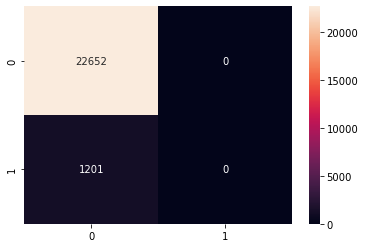

In [59]:
import seaborn as sns
sns.heatmap(cm, annot=True,fmt='d')

In [60]:
print(classification_report(y_test, Y_predlog))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     22652
           1       0.00      0.00      0.00      1201

    accuracy                           0.95     23853
   macro avg       0.47      0.50      0.49     23853
weighted avg       0.90      0.95      0.93     23853



/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# over sampling - only on train set 

In [61]:
sampling = pd.concat([X_train_scaled, y_train],axis=1)
c1 = sampling[sampling['TARGET_B']==1]
c0 = sampling[sampling['TARGET_B']==0]

In [62]:
y_train

,TARGET_B
0,0
1,0
2,0
3,0
4,0
...,...
71554,0
71555,0
71556,0
71557,0


In [63]:
X_train_scaled

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
0,0.784946,0.000000,0.412049,0.587629,0.166667,0.555556,0.000000,0.000000,0.373737,0.363636,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.498208,0.000014,0.185479,0.814433,0.500000,0.555556,0.000000,0.000000,0.424242,0.060606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.211470,0.000000,0.000000,0.624862,0.666667,0.555556,0.000000,0.020202,0.515152,0.464646,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.426523,0.000014,0.206488,0.793814,0.666667,0.555556,0.000000,0.070707,0.323232,0.464646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.354839,0.000014,0.196807,0.793814,0.666667,0.555556,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71554,0.498208,0.000014,0.278270,0.721649,0.166667,0.555556,0.000000,0.030303,0.333333,0.282828,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
71555,0.426523,0.000000,0.526468,0.463918,0.666667,0.666667,0.016598,0.000000,0.262626,0.272727,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
71556,0.211470,0.000028,0.515036,0.484536,0.666667,0.555556,0.000000,0.000000,0.424242,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
71557,0.784946,0.000389,0.494439,0.505155,0.666667,0.555556,0.000000,0.010101,0.262626,0.181818,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [64]:
sampling

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,TARGET_B
0,0.784946,0.000000,0.412049,0.587629,0.166667,0.555556,0.000000,0.000000,0.373737,0.363636,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,0.498208,0.000014,0.185479,0.814433,0.500000,0.555556,0.000000,0.000000,0.424242,0.060606,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.211470,0.000000,0.000000,0.624862,0.666667,0.555556,0.000000,0.020202,0.515152,0.464646,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
3,0.426523,0.000014,0.206488,0.793814,0.666667,0.555556,0.000000,0.070707,0.323232,0.464646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.354839,0.000014,0.196807,0.793814,0.666667,0.555556,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71554,0.498208,0.000014,0.278270,0.721649,0.166667,0.555556,0.000000,0.030303,0.333333,0.282828,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
71555,0.426523,0.000000,0.526468,0.463918,0.666667,0.666667,0.016598,0.000000,0.262626,0.272727,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
71556,0.211470,0.000028,0.515036,0.484536,0.666667,0.555556,0.000000,0.000000,0.424242,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
71557,0.784946,0.000389,0.494439,0.505155,0.666667,0.555556,0.000000,0.010101,0.262626,0.181818,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


<function matplotlib.pyplot.show(close=None, block=None)>

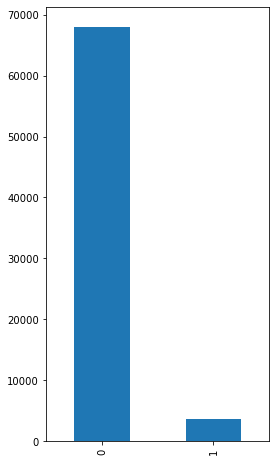

In [65]:
import matplotlib.pyplot as plt
ax = sampling['TARGET_B'].value_counts().plot(kind='bar', figsize=(4,8))
plt.show

In [66]:
c1

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,TARGET_B
8,0.784946,0.000000,0.000000,0.624862,0.666667,0.555556,0.000000,0.020202,0.252525,0.222222,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
37,0.426523,0.000014,0.196498,0.793814,0.666667,0.555556,0.000000,0.000000,0.111111,0.262626,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
55,0.784946,0.000000,0.000000,0.624862,0.500000,0.555556,0.000000,0.000000,0.252525,0.292929,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
62,0.498208,0.000028,0.319464,0.680412,0.000000,0.888889,0.008299,0.000000,0.252525,0.353535,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
64,0.283154,0.000000,0.371885,0.618557,0.833333,0.555556,0.000000,0.000000,0.252525,0.252525,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71484,0.354839,0.000000,0.175180,0.824742,0.833333,0.777778,0.041494,0.000000,0.393939,0.121212,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
71490,0.784946,0.000056,0.000000,0.624862,0.666667,0.555556,0.000000,0.000000,0.393939,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
71518,0.856631,0.000014,0.350257,0.649485,0.000000,0.000000,0.029046,0.000000,0.272727,0.141414,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
71537,0.641577,0.000000,0.473841,0.525773,0.166667,0.555556,0.000000,0.000000,0.444444,0.272727,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [67]:
from sklearn.utils import resample

c1_upsample = resample(c1,replace=True,n_samples=len(c0))
c1up = pd.concat([c1_upsample,c0],axis=0)

In [68]:
c1up.shape

(135834, 412)

In [70]:
# X_up

In [71]:
from sklearn.utils import resample
X_up = c1up.drop(columns=['TARGET_B'])
y_up = c1up['TARGET_B']

classifier = LogisticRegression(solver='saga')
classifier.fit(X_up, y_up)
# predicted = classifier.predict(X_up,y_up)
# print(classification_report(y_test, predicted))

/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [73]:
predicted = classifier.predict(X_test_scaled)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.62      0.75     22652
           1       0.07      0.53      0.12      1201

    accuracy                           0.61     23853
   macro avg       0.52      0.58      0.44     23853
weighted avg       0.92      0.61      0.72     23853



In [75]:
cm2 = confusion_matrix(y_test, predicted)

<AxesSubplot:>

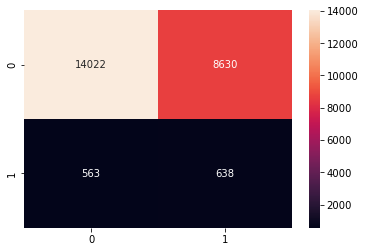

In [76]:
import seaborn as sns
sns.heatmap(cm2, annot=True,fmt='d')